In [7]:
! pip install networkx osmnx matplotlib scipy

  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import osmnx as ox

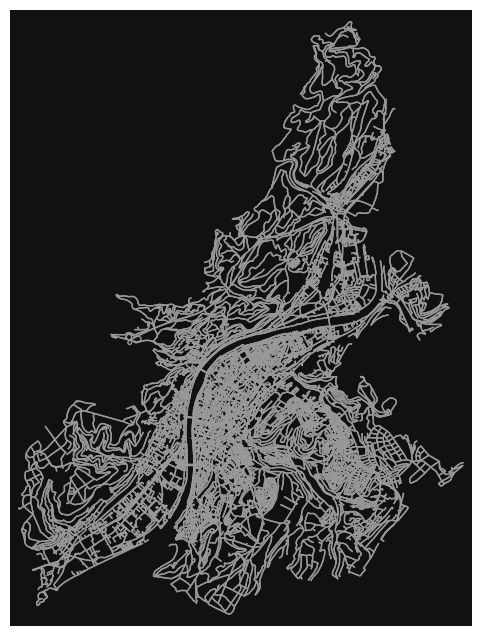

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [15]:
ox.plot_graph(ox.graph_from_place("Trier, Germany"),  node_size=0, node_alpha=0, node_color='none')

In [3]:
city = "Trier, Germany"

G =  ox.graph_from_place(city, network_type='drive', custom_filter='["highway"~"primary|secondary|residential|motorway"]')


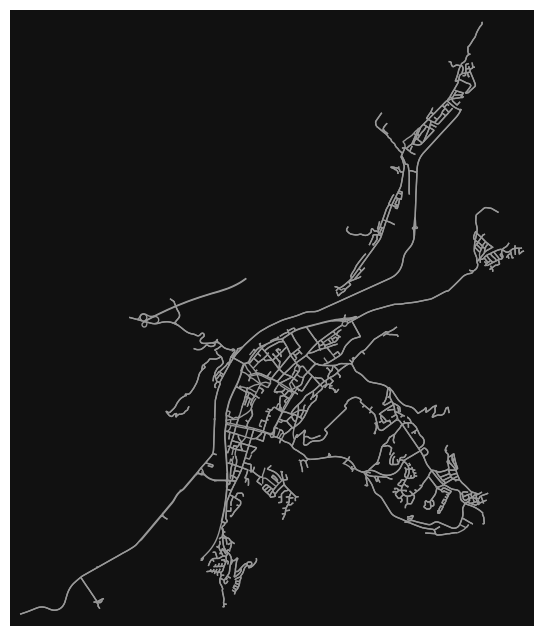

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
# Plot the graph without nodes, only edges
ox.plot_graph(G, node_size=0, node_alpha=0, node_color='none')

In [5]:
# Get node coordinates
nodes, edges = ox.graph_to_gdfs(G)
nodes = nodes[['y', 'x']]  # Only keep coordinates for simplicity
print(nodes.head())
print(nodes.shape)

                  y         x
osmid                        
10602396  49.750094  6.637228
10602410  49.749518  6.640148
10602412  49.753861  6.642500
10602431  49.754348  6.644230
10602432  49.753833  6.645809
(1466, 2)


In [8]:
import networkx as nx
# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(G)

# Convert to a dense matrix if needed
dense_matrix = adj_matrix.todense()

print(dense_matrix)
print(dense_matrix.shape)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1466, 1466)


In [9]:
# Save the adjacency matrix to a file
import numpy as np
np.savetxt("adjacency_matrix.csv", dense_matrix, delimiter=",")
nodes.to_csv("node_coordinates.csv")

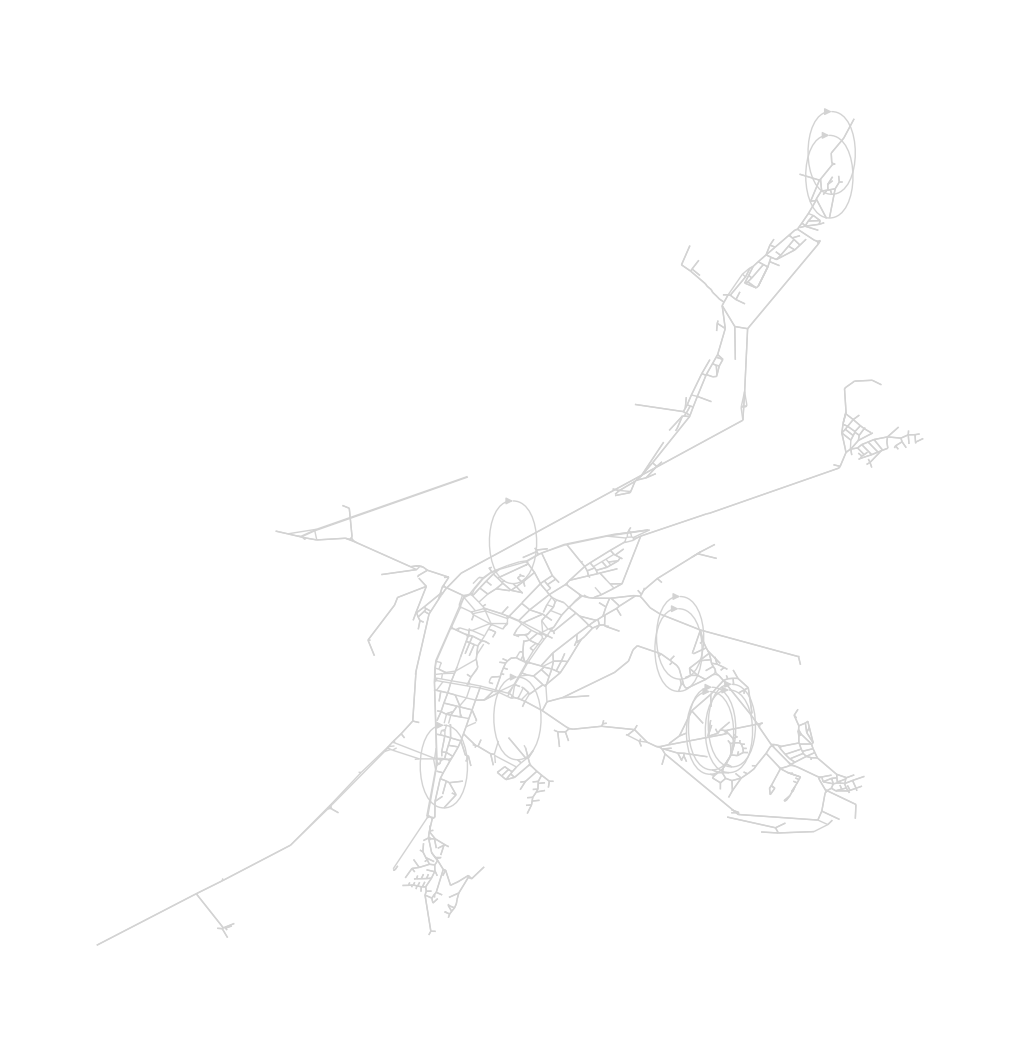

In [10]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load adjacency matrix and node coordinates
loaded_dense_matrix = np.loadtxt("adjacency_matrix.csv", delimiter=",")
loaded_nodes = pd.read_csv("node_coordinates.csv", index_col=0)

# Create the graph from the adjacency matrix
reconstructed_G = nx.from_numpy_array(loaded_dense_matrix, create_using=nx.DiGraph())

# Assign IDs correctly
mapping = {i: index for i, index in enumerate(loaded_nodes.index)}

# Relabel nodes in the graph
reconstructed_G = nx.relabel_nodes(reconstructed_G, mapping)

# Add coordinates to nodes
for node_id, node_data in loaded_nodes.iterrows():
    nx.set_node_attributes(reconstructed_G, {node_id: {'y': node_data['y'], 'x': node_data['x']}})

# Extract the positions dictionary for node placement
positions = {node_id: (data['x'], data['y']) for node_id, data in loaded_nodes.iterrows()}

# Plot the graph using NetworkX without nodes and labels
plt.figure(figsize=(10, 10), facecolor='black')
nx.draw(reconstructed_G, pos=positions, with_labels=False, arrows=False, node_size=0, edge_color='lightgray')
plt.title('Reconstructed Graph', color='white')
plt.show()

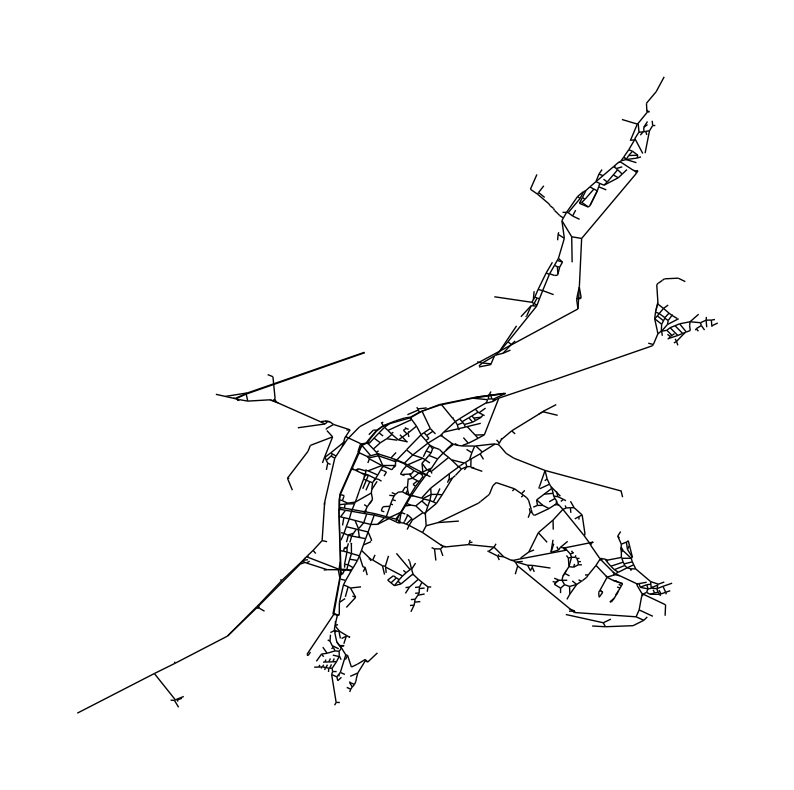

In [13]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load adjacency matrix and node coordinates
loaded_dense_matrix = np.loadtxt("adjacency_matrix.csv", delimiter=",")
loaded_nodes = pd.read_csv("node_coordinates.csv", index_col=0)

# Create the graph from the adjacency matrix
reconstructed_G = nx.from_numpy_array(loaded_dense_matrix, create_using=nx.DiGraph())

# Assign IDs correctly
mapping = {i: index for i, index in enumerate(loaded_nodes.index)}

# Relabel nodes in the graph
reconstructed_G = nx.relabel_nodes(reconstructed_G, mapping)

# Remove self-loops
self_loops = list(nx.selfloop_edges(reconstructed_G))
reconstructed_G.remove_edges_from(self_loops)

# Removing multi-edges (keeping only one edge between nodes)
simplified_G = nx.Graph(reconstructed_G)  # convert to simple graph removing multi-edges

# Add coordinates to nodes
for node_id, node_data in loaded_nodes.iterrows():
    nx.set_node_attributes(simplified_G, {node_id: {'y': node_data['y'], 'x': node_data['x']}})

# Extract the positions dictionary for node placement
positions = {node_id: (data['x'], data['y']) for node_id, data in loaded_nodes.iterrows()}

# Set up plot
fig, ax = plt.subplots(figsize=(10, 10), facecolor='black')
fig.patch.set_facecolor('black')

# Draw the graph without self-loops/multi-edges and with improved visibility
nx.draw(
    simplified_G, pos=positions, with_labels=False, arrows=False,
    node_size=0, edge_color='black', width=1, ax=ax
)

# Adjust the plot aesthetics
plt.axis('off')
plt.show()

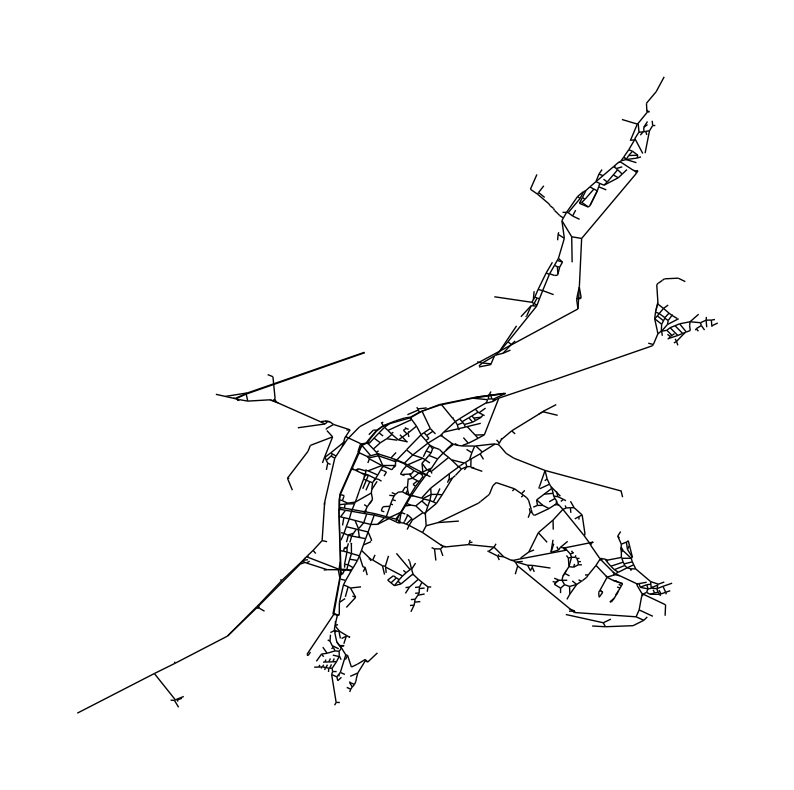

In [12]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load adjacency matrix and node coordinates
loaded_dense_matrix = np.loadtxt("adjacency_matrix.csv", delimiter=",")
loaded_nodes = pd.read_csv("transformed_coordinates.csv", index_col=0)

# Create the graph from the adjacency matrix
reconstructed_G = nx.from_numpy_array(loaded_dense_matrix, create_using=nx.DiGraph())

# Assign IDs correctly
mapping = {i: index for i, index in enumerate(loaded_nodes.index)}

# Relabel nodes in the graph
reconstructed_G = nx.relabel_nodes(reconstructed_G, mapping)

# Remove self-loops
self_loops = list(nx.selfloop_edges(reconstructed_G))
reconstructed_G.remove_edges_from(self_loops)

# Removing multi-edges (keeping only one edge between nodes)
simplified_G = nx.Graph(reconstructed_G)  # convert to simple graph removing multi-edges

# Add coordinates to nodes
for node_id, node_data in loaded_nodes.iterrows():
    nx.set_node_attributes(simplified_G, {node_id: {'y': node_data['y'], 'x': node_data['x']}})

# Extract the positions dictionary for node placement
positions = {node_id: (data['x'], data['y']) for node_id, data in loaded_nodes.iterrows()}

# Set up plot
fig, ax = plt.subplots(figsize=(10, 10), facecolor='black')
fig.patch.set_facecolor('black')

# Draw the graph without self-loops/multi-edges and with improved visibility
nx.draw(
    simplified_G, pos=positions, with_labels=False, arrows=False,
    node_size=0, edge_color='black', width=1, ax=ax
)

# Adjust the plot aesthetics
plt.axis('off')
plt.show()